# HANDLING WITH OUTLIERS (SELF-STUDY)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
original_df = sns.load_dataset('diamonds')
df = original_df.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df = df.select_dtypes(include='number')
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


### Detecting outliers with graph

In [7]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='table'>

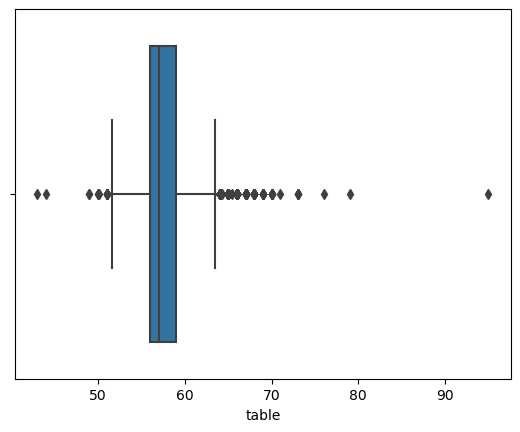

In [8]:
sns.boxplot(x=df['table'])

<Axes: xlabel='table', ylabel='Count'>

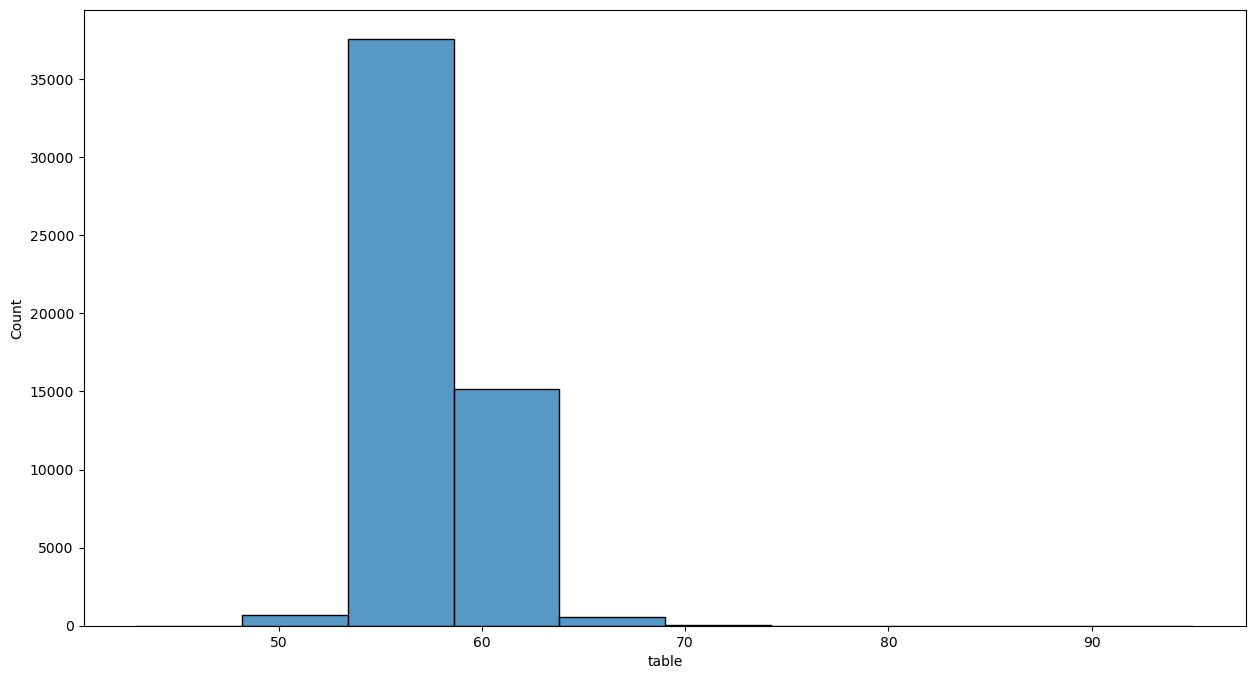

In [9]:
plt.figure(figsize= (15,8))
sns.histplot(df.table, bins = 10, kde=False)

In [10]:
df.table.sort_values(ascending=True)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [11]:
df.table.sort_values(ascending=True).tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [12]:
df.table.sort_values(ascending=True).tail(10).index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [13]:
tail_index = df.table.sort_values(ascending=True).tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [14]:
df.loc[tail_index]

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


In [15]:
df.carat.sort_values(ascending=True)

31593    0.20
31597    0.20
31596    0.20
31595    0.20
31594    0.20
         ... 
25999    4.01
25998    4.01
27130    4.13
27630    4.50
27415    5.01
Name: carat, Length: 53940, dtype: float64

### 1st way of specifying IQR

In [16]:
Q1 = df['table'].quantile(0.25)
Q1

56.0

In [17]:
Q3 = df['table'].quantile(0.75)
Q3

59.0

In [18]:
IQR = Q3 - Q1
IQR

3.0

### 2nd way of specifying IQR

In [19]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [20]:
type(df.table.describe())

pandas.core.series.Series

In [21]:
df.table.describe().loc['25%']

56.0

In [22]:
df.table.describe().loc['75%']

59.0

In [23]:
Q1 = df.table.describe().loc['25%']
Q3 = df.table.describe().loc['75%']

IQR = Q3 -Q1
IQR

3.0

### 3rd way of specifying IQR

In [24]:
from scipy import stats

In [25]:
stats.iqr(df.table)

3.0

In [26]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [27]:
lower_lim


51.5

In [28]:
upper_lim

63.5

### Now let's find potential outliers

In [29]:
(df.table < lower_lim).sum()

16

In [30]:
(df.table > upper_lim).sum()

589

In [31]:
(df.table > upper_lim) | (df.table < lower_lim)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [32]:
df.table[(df.table > upper_lim) | (df.table < lower_lim)].count()

605

In [33]:
df.table[(df.table > upper_lim) | (df.table < lower_lim)].sort_values(ascending=True)

11368    43.0
35633    44.0
22701    49.0
5979     49.0
25179    50.0
         ... 
52860    73.0
49375    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 605, dtype: float64

In [34]:
df.loc[(df.table > upper_lim) | (df.table < lower_lim)]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [35]:
df.table[~((df.table > upper_lim) | (df.table < lower_lim))].count()

53335

In [36]:
df.loc[~((df.table > upper_lim) | (df.table < lower_lim))]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


## Removing the outliers

In [37]:
outlier_index = df.loc[(df.table > upper_lim) | (df.table < lower_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [38]:
not_outliers = (df.table <= upper_lim) & (df.table >= lower_lim)
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [39]:
cleaned_df = df[(df.table <= upper_lim) & (df.table >= lower_lim)]
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
df_cleaned = df.loc[~((df.table > upper_lim) | (df.table < lower_lim))]
df_cleaned

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [42]:
len(df)

53940

### Second way of removing: drop()

In [43]:
df.drop(outlier_index, axis=0)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='table'>

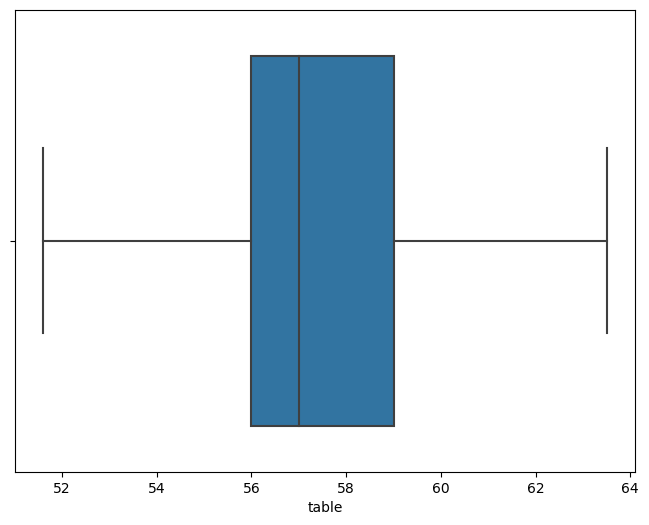

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x=cleaned_df.table)

<Axes: xlabel='table'>

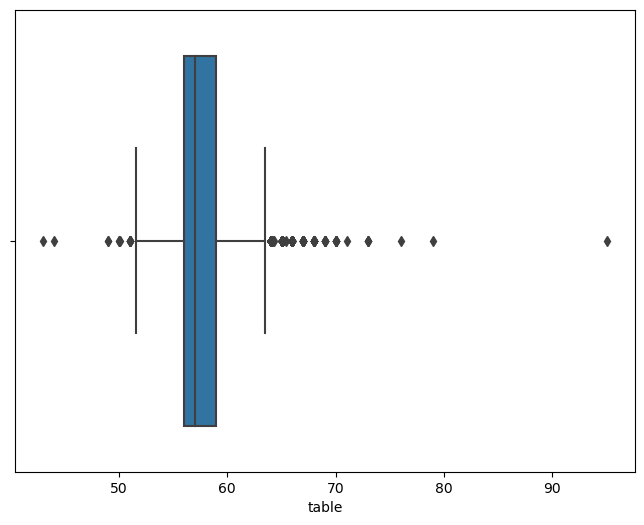

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.table)

<Axes: xlabel='table', ylabel='Count'>

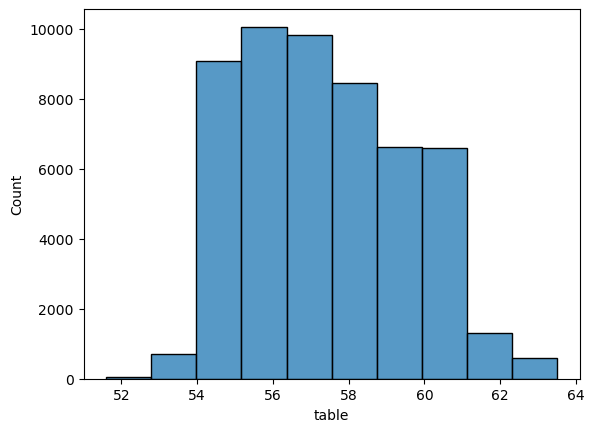

In [46]:
sns.histplot(cleaned_df.table,bins=10,kde=False)

<Axes: xlabel='table', ylabel='Count'>

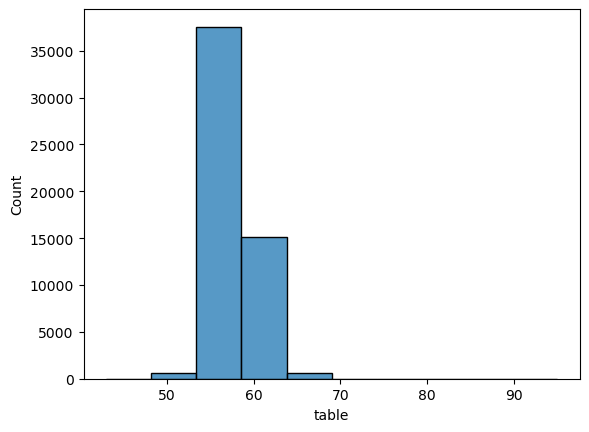

In [47]:
sns.histplot(df.table,bins=10,kde=False)

In [48]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [49]:
df.table.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [50]:
df.table.describe().values

array([5.39400000e+04, 5.74571839e+01, 2.23449056e+00, 4.30000000e+01,
       5.60000000e+01, 5.70000000e+01, 5.90000000e+01, 9.50000000e+01])

In [53]:
compare = pd.DataFrame(df.table.describe().values, index=df.table.describe().index,columns=['original'])
compare

,original
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


In [54]:
compare['clean'] = cleaned_df.table.describe().values
compare

,original,clean
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [57]:
pd.DataFrame([df.table.describe(),cleaned_df.table.describe()],index=['original','clean']).T

,original,clean
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


## Limitation and Transformation of the Outliers

### .winsorize() method

In [58]:
from scipy.stats.mstats import winsorize

In [59]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
winsorize(df.table,(0.02,0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [62]:
df.table[df.table < lower_lim]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [65]:
a = len(df.table[df.table < lower_lim]) / len(df)
a

0.00029662588060808305

In [67]:
b = len(df.table[df.table > upper_lim]) / len(df)
b

0.010919540229885057

In [68]:
winsorize(df.table,(a,b))

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [69]:
table_win = winsorize(df.table,(a,b))

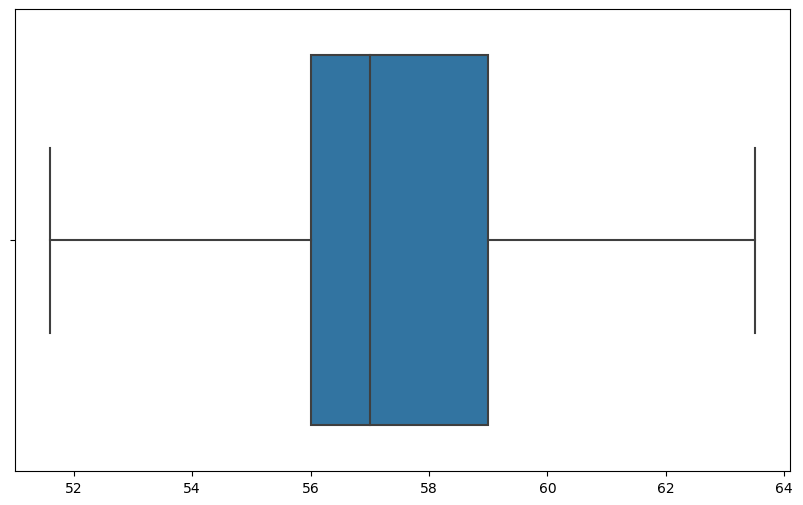

In [70]:
plt.figure(figsize = (10,6))

sns.boxplot(x=table_win);

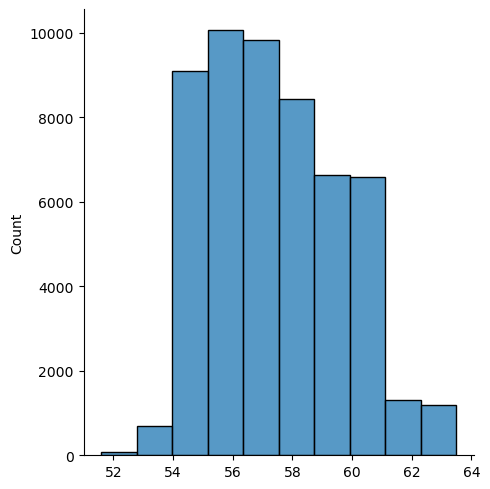

In [72]:
sns.displot(table_win, bins=10, kde=False);

In [73]:
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [74]:
table_winsorize = pd.Series(table_win)
table_winsorize

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [76]:
len(df)

53940

In [79]:
table_winsorize.sort_values()

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
         ... 
15862    63.5
5239     63.5
26773    63.5
35683    63.5
20756    63.5
Length: 53940, dtype: float64

In [81]:
pd.DataFrame([df.table.describe(), table_winsorize.describe()],
            index=['original','clean_with_win']).T

,original,clean_with_win
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [82]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [83]:
table_winsorize.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [84]:
table_winsorize[table_winsorize == 51.6].count()

17

In [85]:
table_winsorize[table_winsorize == 63.5].count()

590

## Transformation using log() method

In [86]:
df


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


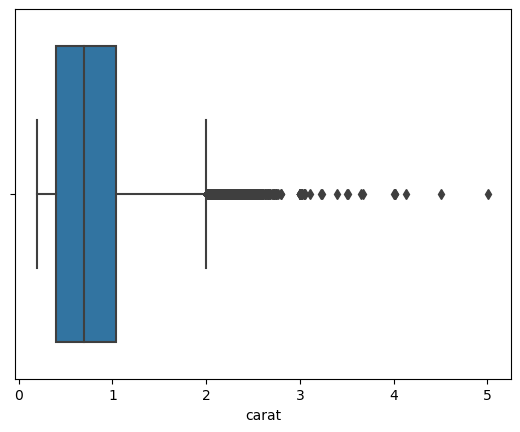

In [92]:
sns.boxplot(x=df.carat);

<Axes: xlabel='carat', ylabel='Count'>

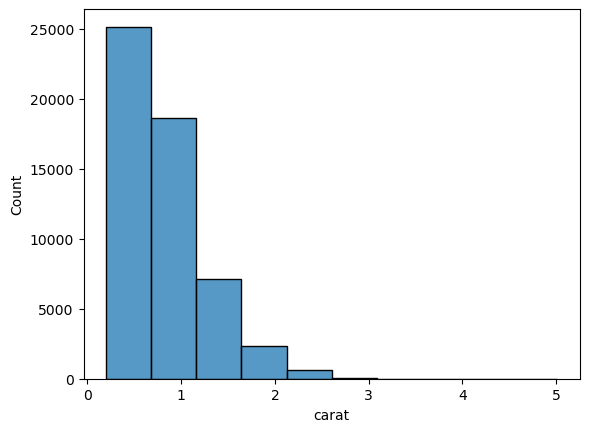

In [93]:
sns.histplot(df.carat, bins=10,kde=False)

In [95]:
carat_log = np.log(df.carat)
carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<Axes: ylabel='carat'>

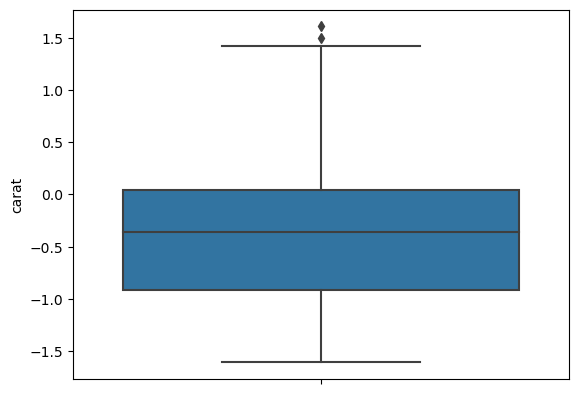

In [97]:
sns.boxplot(y=carat_log)

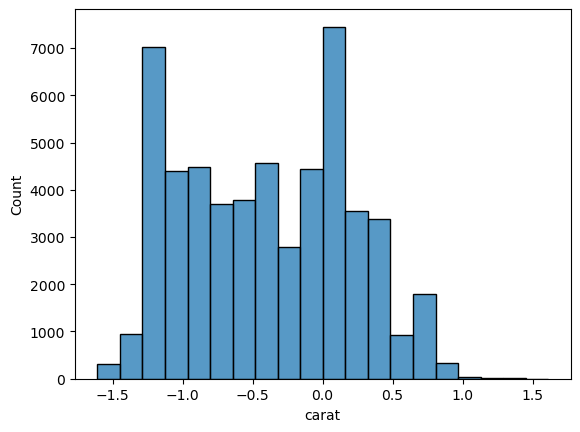

In [104]:
sns.histplot(x = carat_log,bins=20);

In [106]:
df['carat_log'] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [107]:
df.carat_log.sort_values().tail()

25999    1.388791
25998    1.388791
27130    1.418277
27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [110]:
drop_index = df.carat_log.sort_values().tail(2).index
drop_index

Int64Index([27630, 27415], dtype='int64')

In [112]:
df.drop(df.carat_log.sort_values().tail(2).index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [113]:
len(df)

53940